## Summer Olympics Medals Analysis

### Methods we are gonna to use:
- Filtering and indexing (one-level, multi-level)
- Reshaping DataFrames with pivot()
- pivot_table()

### Groupby ( to define what kind of data we have, how we can insert cattegories)
- unique()
- value_counts()

### Aggregations, transformations, filtering

#### Grouping and aggregating

The Olympic medal data for the following exercises comes from The Guardian. It comprises records of all events held at the Olympic games between 1896 and 2012.

We have loaded the data into a DataFrame medals. Now we  find the total number of medals awarded to the USA per edition. 

In [12]:
import pandas as pd
medals = pd.read_csv('all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [13]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

#### Using .value_counts() for ranking

Now we are gonna use the pandas Series method .value_counts() to determine the top 15 countries ranked by total number of medals.

Notice that .value_counts() sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

In [15]:
country_names = medals['NOC']
medal_counts = country_names.value_counts()
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

#### It looks like the top 5 countries here are USA, URS, GBR, FRA, and ITA

### Using .pivot_table() to count medals by type

Now we can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

The next step is to use .pivot_table() first to aggregate the total medals by type. Then,we can use .sum() along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, we can display the results from the last step with a bit more detail.

In [21]:
# Construct the pivot table: counted
counted = medals.pivot_table(index = 'NOC', columns = 'Medal', values = 'Athlete', aggfunc = 'count')
counted.loc[['URS', 'USA', 'GBR', 'FRA', 'GER'],:]

Medal,Bronze,Gold,Silver
NOC,,,
URS,584.0,838.0,627.0
USA,1052.0,2088.0,1195.0
GBR,505.0,498.0,591.0
FRA,475.0,378.0,461.0
GER,454.0,407.0,350.0


In [22]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis = 'columns')
counted.loc[['URS', 'USA', 'GBR', 'FRA', 'GER'],:]

Medal,Bronze,Gold,Silver,totals
NOC,,,,
URS,584.0,838.0,627.0,2049.0
USA,1052.0,2088.0,1195.0,4335.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
GER,454.0,407.0,350.0,1211.0


In [33]:
## Sort counted by the 'totals' column
counted = counted.sort_values('totals',ascending = False)
counted.head(10)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


### Next we are gonna to use methods:
- value_counts()
- unique()
- groupby() with aggregators mean, std, count

### Notice we ve got 2 columns with names Gender and Event_gender. Lets find out is there any difference

In [40]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [43]:
## Select columns: ev_gen
ev_gen = medals.loc[:,['Event_gender', 'Gender']]
ev_gen.head()

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


In [46]:
# drop duplicates
ev_gen_uniques = ev_gen.drop_duplicates()
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


### Finding possible errors with .groupby()
We will now use .groupby() to continue exploration. Our job is to group by 'Event_gender' and 'Gender' and count the rows.

In [47]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

In [49]:
# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()
medal_count_by_gender.head()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

#### now we see data error Event_gender = W while Gender = Men, lets define location

In [52]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W')&(medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]
suspect


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


####  according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

### Constructing alternative country rankings

#### Counting distinct events

In [55]:
medals['Sport'].unique() # 42 distinct events since 1896

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

### Ranking of distinct events
- top five countries that have won medals in the most sports
- compare medal counts of USA and USSR from 1952 to 1988
- idxmax(): Row or column label where maximum value is loacted
- idxmin(): Row or column label where minimum value is located

### Using .nunique() to rank by distinct sports

Which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories

In [57]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')
# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending = False)
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

#### Interestingly, the USSR is not in the top 5 in this category, while the USA continues to remain on top. What could be the cause of this?

### Counting USA vs. USSR Cold War Olympic Sports

    The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). On this step we aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

    There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR.

In [58]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

In [60]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

In [65]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]
cold_war_medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
8019,Helsinki,1952,Aquatics,Diving,"LEE, Samuel",USA,Men,10m platform,M,Gold
8021,Helsinki,1952,Aquatics,Diving,"STOVER-IRWIN, Juno Roslays",USA,Women,10m platform,W,Bronze
8022,Helsinki,1952,Aquatics,Diving,"MCCORMICK, Patricia",USA,Women,10m platform,W,Gold
8023,Helsinki,1952,Aquatics,Diving,"MYERS-POPE, Paula Jean",USA,Women,10m platform,W,Silver
8024,Helsinki,1952,Aquatics,Diving,"CLOTWORTHY, Robert Lynn",USA,Men,3m springboard,M,Bronze


In [66]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

In [67]:
# Create Nsports
Nsports = country_grouped.Sport.nunique().sort_values(ascending = False)
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

### As you can see, the USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!

### Counting USA vs. USSR Cold War Olympic Medals

Lets see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.
- slice the Cold War period and subset the 'USA' and 'URS' columns.
- make a Series from this slice of the pivot table that tells which country won the most medals in that edition using .idxmax(axis='columns'). If .max() returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument axis=columns or axis=1 is required because, by default, this aggregation would be done along columns for a DataFrame.
    The final Series contains either 'USA' or 'URS' according to which country won the most medals in each Olympic edition. We will use use .value_counts() to count the number of occurrences of each.


In [76]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index = 'Edition', columns = 'NOC', values = 'Athlete', aggfunc = 'count')
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc['1952':'1988', ['USA', "URS"]]
cold_war_usa_urs_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [78]:
# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [79]:
most_medals.value_counts()

URS    8
USA    2
dtype: int64

###  USSR is on top again, beats USA 8:2

### Reshaping DataFrames for visualization

In [80]:
all_medals = medals.groupby('Edition')['Athlete'].count()
all_medals.head(6)

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
Name: Athlete, dtype: int64

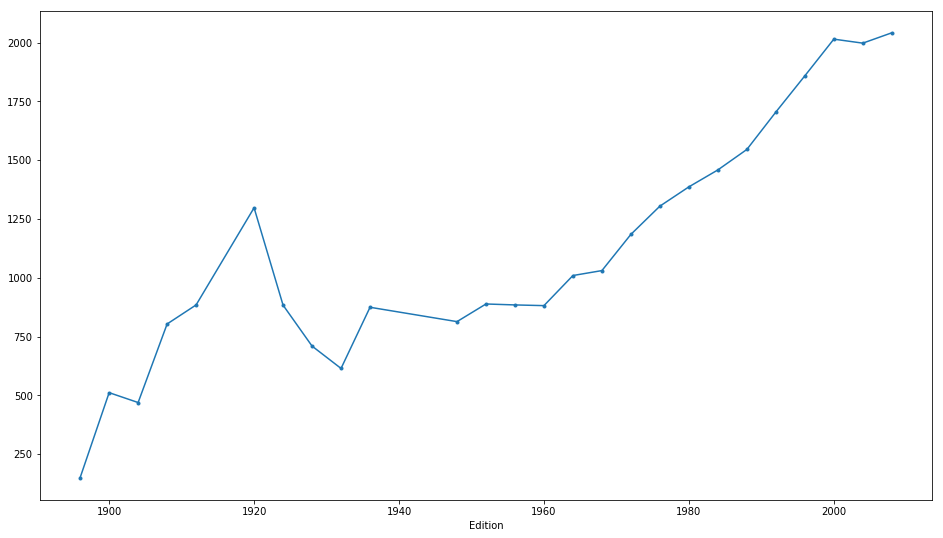

In [118]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
all_medals.plot(kind = 'line', marker = '.') # Series all medals, all years
plt.show()

#### We can observe mostly upgoing trend with sort of descrasing in 20-30's , in the 21 century growth of quantity of medals has stopped and we can see stable floating

#### Grouping data

In [84]:
france = medals.NOC == 'FRA'
france_grps = medals[france].groupby(['Edition', 'Medal'])
france_grps['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

In [86]:
# Matplotlib works best with one-level index
france_medals = france_grps['Athlete'].count().unstack()
france_medals.head(12)# single level index

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0
1924,20.0,39.0,63.0
1928,13.0,7.0,16.0
1932,6.0,23.0,8.0
1936,18.0,12.0,13.0


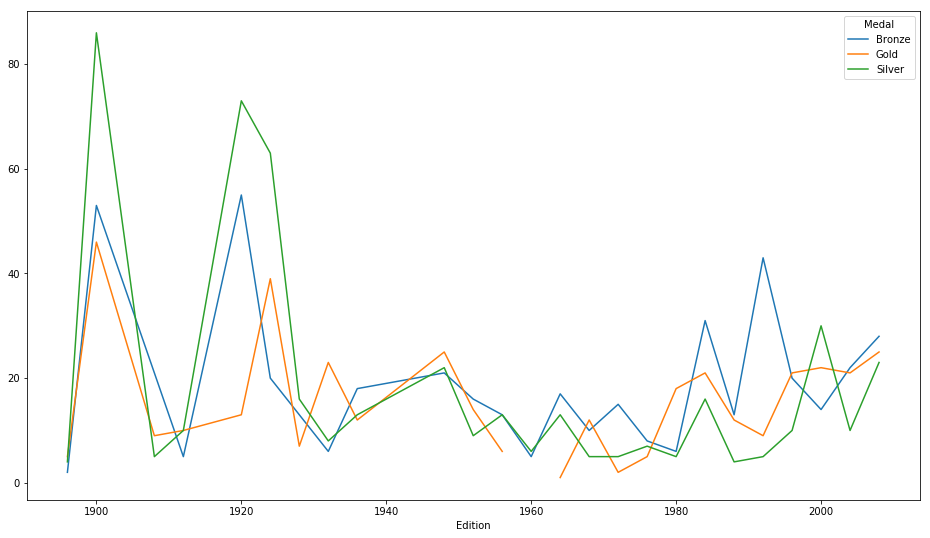

In [111]:
plt.rcParams["figure.figsize"] = [16,9]
france_medals.plot()
plt.show()

In [ ]:
### France performance was expressed by two leaps in 1900 and 1924

### Visualizing USA Medal Counts by Edition: Line Plot

Visualizing the medal counts by 'Edition' for the USA.

In [103]:
usa = medals[medals.NOC == 'USA']
usa.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


In [104]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.head(6)

Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
         Silver    14
Name: Athlete, dtype: int64

In [105]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.head(6)

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25
1920,38,110,45


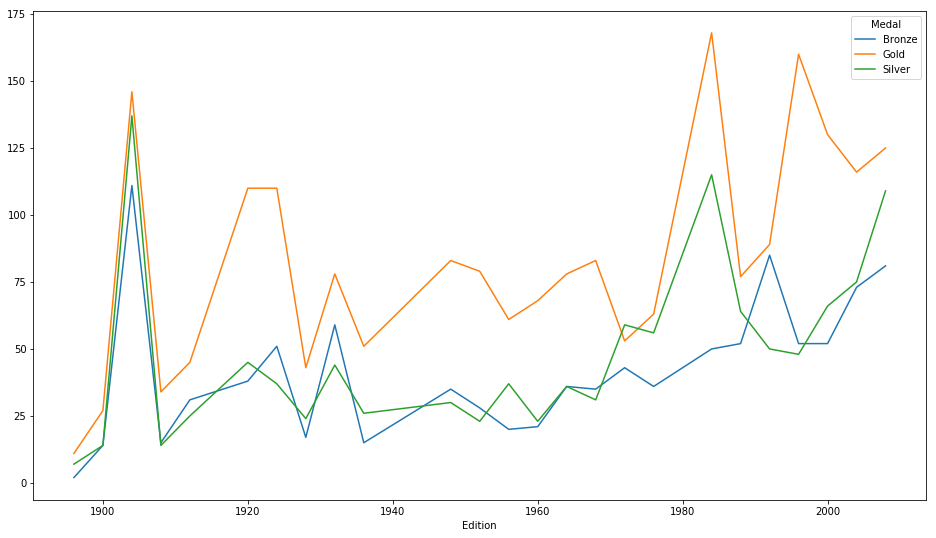

In [113]:
plt.rcParams["figure.figsize"] = [16,9]
usa_medals_by_year.plot()
plt.show()

####  It's difficult to gain too much insight from this visualization, however. We may suggest upgoing trend winning gold medals for all range .

### Visualizing USA Medal Counts by Edition: Area Plot

Now we try visualize the medal counts by 'Edition' for the USA. This time, we will use an area plot to see the breakdown better. 

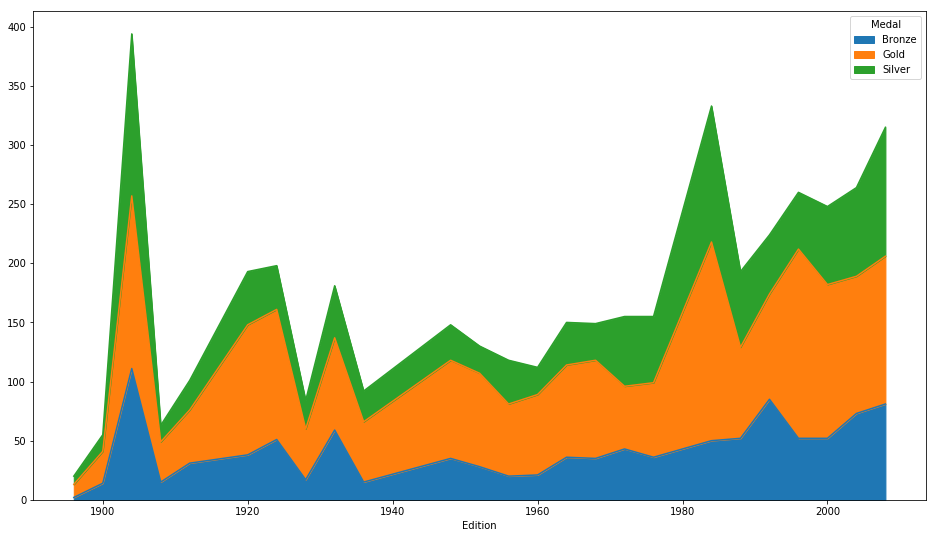

In [114]:
plt.rcParams["figure.figsize"] = [16,9]
usa_medals_by_year.plot.area()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

We may have noticed that the medals are ordered according to a dictionary ordering: Bronze < Gold < Silver. However, we would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

We can achieve this using Categorical types. After redefining the 'Medal' column of the DataFrame medals, we will repeat the area plot from the previous step to see the new ordering.

In [115]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal, categories = ['Bronze', 'Silver', 'Gold'], ordered = True)
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


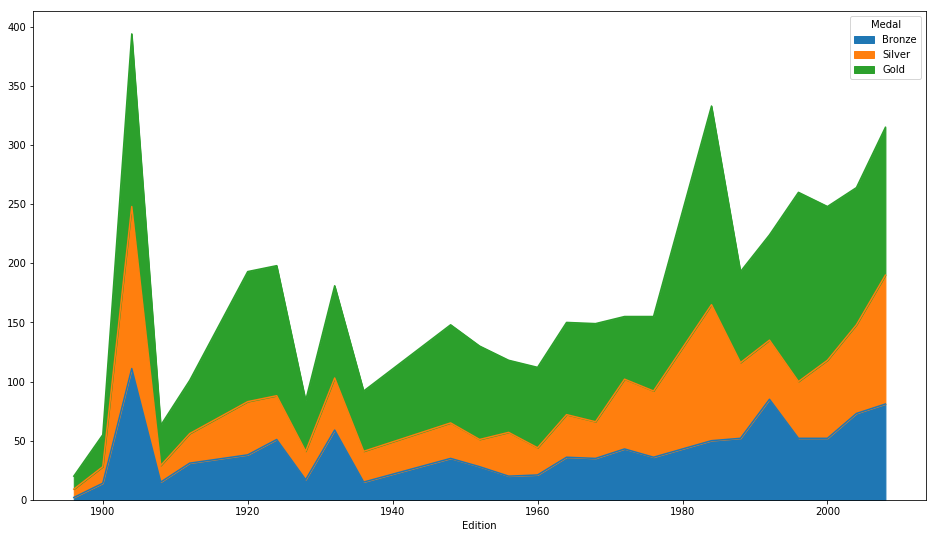

In [117]:
plt.rcParams["figure.figsize"] = [16,9]
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

####  We can claim upgoing trend with "candles" in 1904 and in 1984. The reason of two high peaks was Oympics in USA, in St. Louis and LA respectively. Important note, USSR boycotted 1984 Olympics, it did let USA gain high score undoubtedly. USA traditionally conquers more gold medals than silver and bronze medals.